In [ ]:
import pandas as pd

products = pd.read_csv("products10K.csv", sep=';')
products.head()

In [ ]:
products.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(products['Column1'], test_size = 0.5, random_state = 42)
print(f'Валидационный набор данных {X_val.shape}.\nОбучающий набор данных{X_train.shape}')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
train = vectorizer.fit_transform(X_train).toarray()
test = vectorizer.transform(X_val).toarray()
print(f'Тестовый набор данных {test.shape}.\nОбучающий набор данных{train.shape}')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=10, random_state=42).fit_predict(train)
tsne = TSNE(n_components=2, random_state=42).fit_transform(train)

plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans, s=1)
plt.show()

In [175]:
from keras.models import Model
from keras.layers import Dense, Input

cnt_bottleneck = 32
inputs = train.shape[1]

input_layer = Input(shape = (inputs, ))
encoder_layer = Dense(512, activation = "relu")(input_layer)
encoder_layer = Dense(256, activation = "relu")(encoder_layer)
encoder_layer = Dense(128, activation = "relu")(encoder_layer)
bottleneck_layer = Dense(cnt_bottleneck, name = "bottleneck_layer")(encoder_layer)
decoder_layer = Dense(128, activation = "relu")(bottleneck_layer)
decoder_layer = Dense(256, activation = "relu")(decoder_layer)
decoder_layer = Dense(512, activation = "relu")(decoder_layer)
output_layer = Dense(inputs)(decoder_layer)

autoencoder = Model(inputs = input_layer, outputs = output_layer)
autoencoder.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck_layer (Dense)        │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1000)           │       513,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362,696 (5.20 MB)

 Trainable params: 1,362,696 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [176]:
bottleneck_endoder = Model(inputs = autoencoder.input, outputs = bottleneck_layer)

In [177]:
autoencoder.compile(loss = "mse", optimizer = "adam")
res_autoencode = autoencoder.fit(
    train,
    train,
    batch_size = 64,
    epochs = 40,
    validation_data = (test, test)
)

Epoch 1/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 9.8452e-04 - val_loss: 9.6027e-04
Epoch 2/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.3946e-04 - val_loss: 8.5774e-04
Epoch 3/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.4623e-04 - val_loss: 7.8033e-04
Epoch 4/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.6966e-04 - val_loss: 7.1907e-04
Epoch 5/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.1645e-04 - val_loss: 6.7343e-04
Epoch 6/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.6436e-04 - val_loss: 6.3255e-04
Epoch 7/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.1996e-04 - val_loss: 6.0030e-04
Epoch 8/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.8849e-04 - val_loss: 5.6963e-04
Epoch 9/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.5099e-04 - val_loss: 5.3991e-04
Epoch 10/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.1676e-04 - val_loss: 5.1647e-04
Epoch 11/40
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.0354e-0

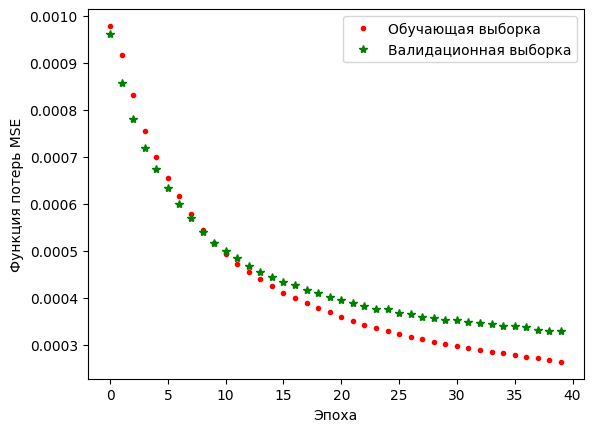

In [178]:
plt.plot(range(40), res_autoencode.history["loss"], "r.", label = "Обучающая выборка")
plt.plot(range(40), res_autoencode.history["val_loss"], "g*", label = "Валидационная выборка")
plt.xlabel("Эпоха")
plt.ylabel("Функция потерь MSE")
plt.legend()
plt.show()

In [179]:
res_encoder = bottleneck_endoder.predict(train)
res_encoder.shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(5000, 32)

In [181]:
import umap.umap_ as umap
res_umap = umap.UMAP(n_components = cnt_bottleneck/2, 
                           n_neighbors = 50, 
                           random_state = 42).fit_transform(res_encoder)
res_umap.shape

C:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\angel\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(5000, 16)

In [182]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(min_samples = 50, eps = 1).fit_predict(res_umap)
n_claster = len(set(clusters))
print(n_claster)

18


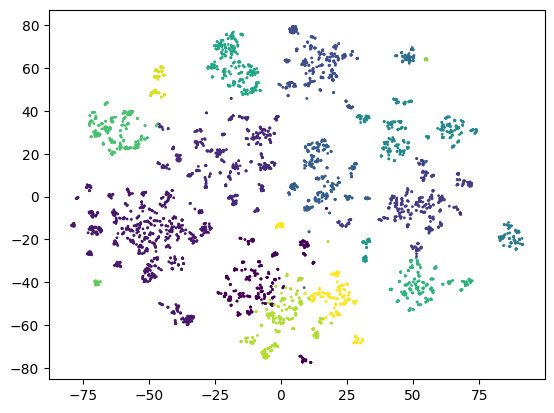

In [183]:
kmeans_autoencoder = KMeans(n_clusters = len(set(clusters)), random_state = 42).fit_predict(res_umap)
tsne_autoencoder = TSNE(2, random_state = 42).fit_transform(res_encoder)
plt.scatter(tsne_autoencoder[:, 0], tsne_autoencoder[:, 1], c = kmeans_autoencoder, s = 1) 
plt.show()

In [184]:
from sklearn.metrics import silhouette_score
without_autoencoder = silhouette_score(train, kmeans)
with_autoencoder = silhouette_score(res_encoder, kmeans_autoencoder)

print(f"Оценка качества кластеризации. До: {without_autoencoder} | после: {with_autoencoder}")

Оценка качества кластеризации. До: 0.06414560314508794 | после: 0.15118221938610077
